### 1.1.1 Пример

Проведем кластеризацию K-средних к набору простых цифр. K-means  
попытается идентифицировать похожие цифры

(1797, 64)
(10, 64)


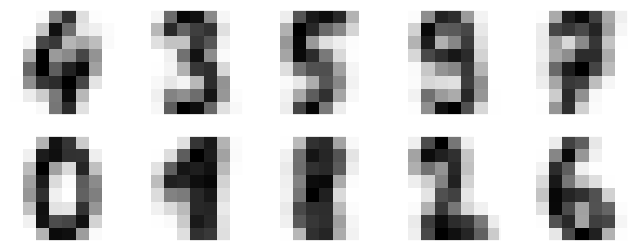

In [52]:
# Начнем с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

# загрузим набор цифр из sklearn
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

# выполним кластеризацию
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Задание

Дан массив данных  
>𝑋 = 𝑛𝑝. 𝑎𝑟𝑟𝑎𝑦([[5,3],  
[10,15],  
[15,12],  
[24,10],  
[30,45],  
[85,70],  
[71,80],  
[60,78],  
[55,52],  
[80,91]])  

Требуется провести кластерный анализ данных методом k-средних.  
Поэкспериментируйте с количеством кластеров.

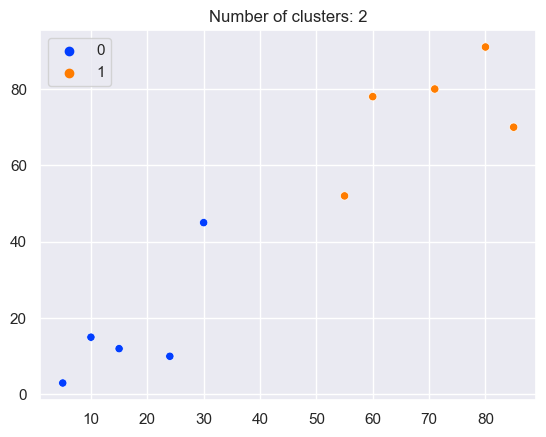

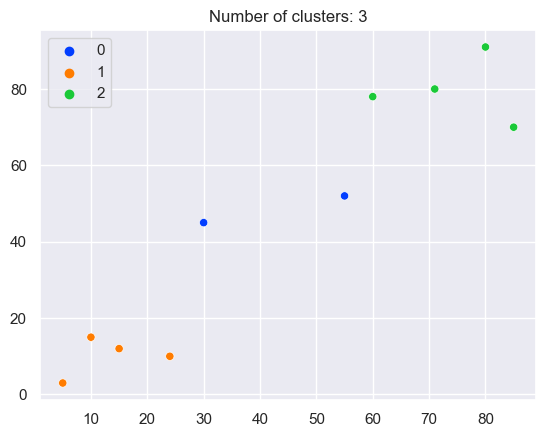

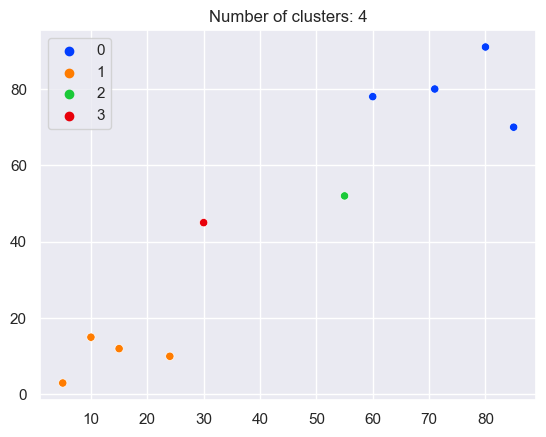

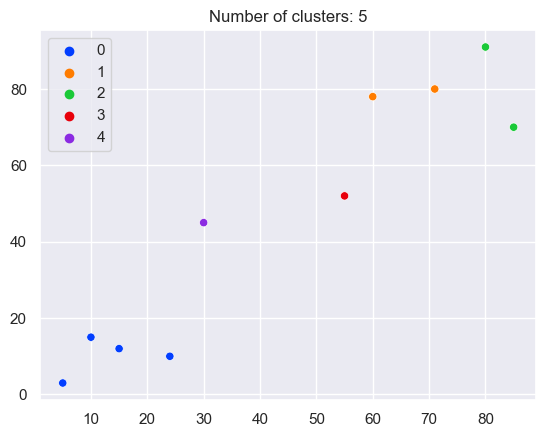

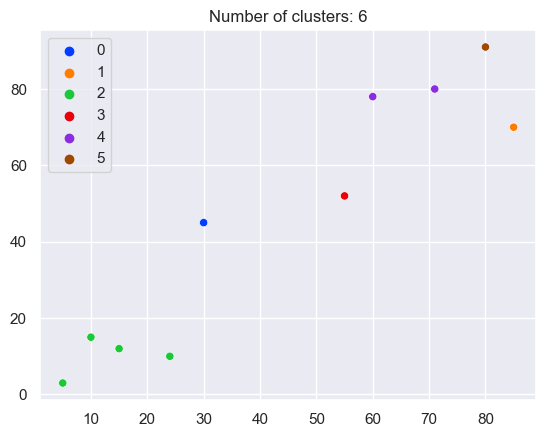

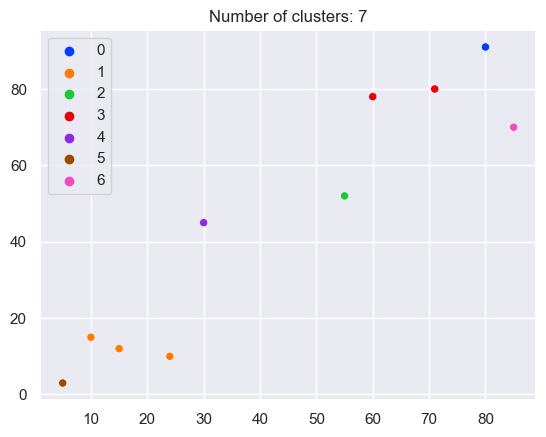

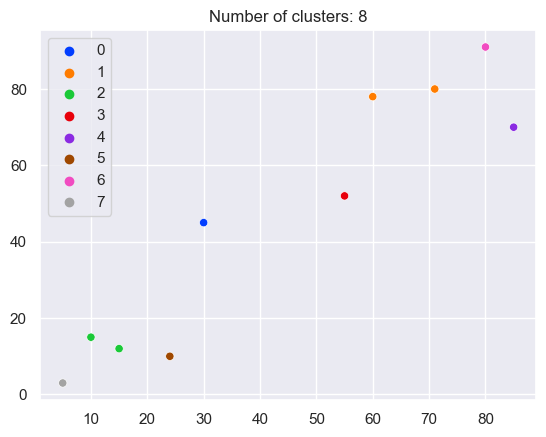

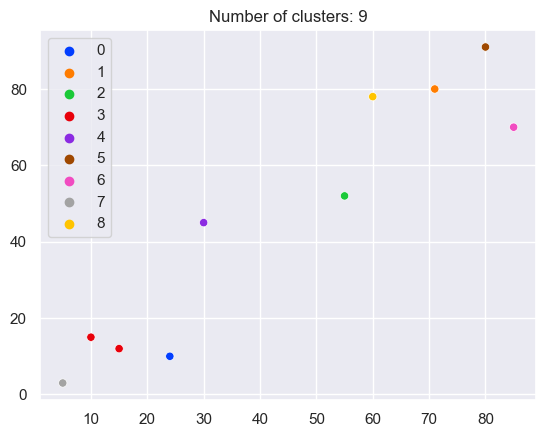

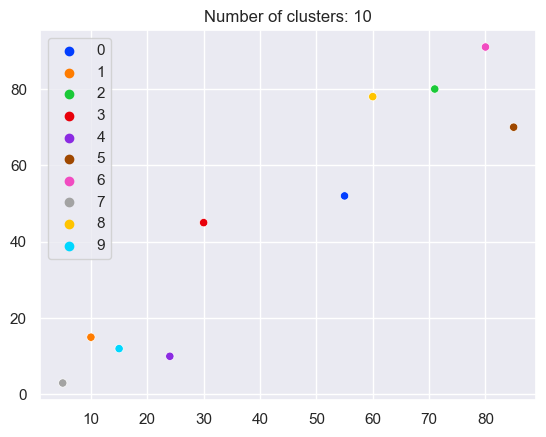

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# загрузим набор данных
X = np.array([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91]])

# определим список возможных значений количества кластеров
n_clusters_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# проведем кластерный анализ для каждого значения количества кластеров
for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(X)
    
    # визуализируем результаты кластеризации
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters, palette='bright')
    plt.title('Number of clusters: {}'.format(n_clusters))
    plt.show()


### Задание

Выполните кластеризацию для набора данных ирисов Фишера. Выполните  
предсказания для модели. Поэкспериментируйте с количеством кластеров.

(150, 4)


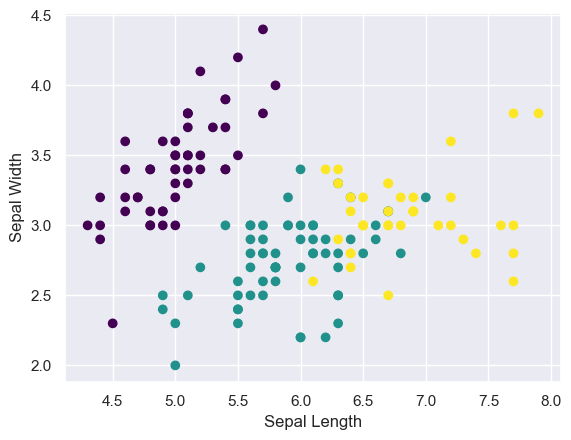

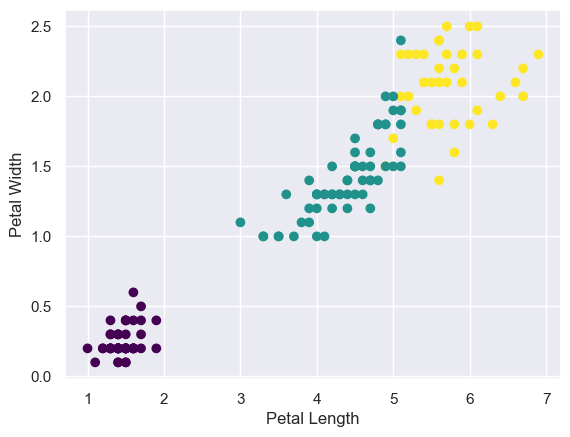

In [21]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Загрузим набор данных ирисов Фишера
iris = load_iris()
X = iris.data

# Выведем количество строк и столбцов массива данных
print(X.shape)

# Определим количество кластеров
n_clusters = 3

# Создадим экземпляр класса KMeans
kmeans = KMeans(n_clusters=n_clusters)

# Выполним кластеризацию
kmeans.fit(X)

# Получим метки кластеров
labels = kmeans.labels_

# Построим график распределения кластеров по признакам Sepal Length и Sepal Width
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Построим график распределения кластеров по признакам Petal Length и Petal Width
plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

### 1.1.2 Пример

Построить дендрограмму для заданного массива данных.

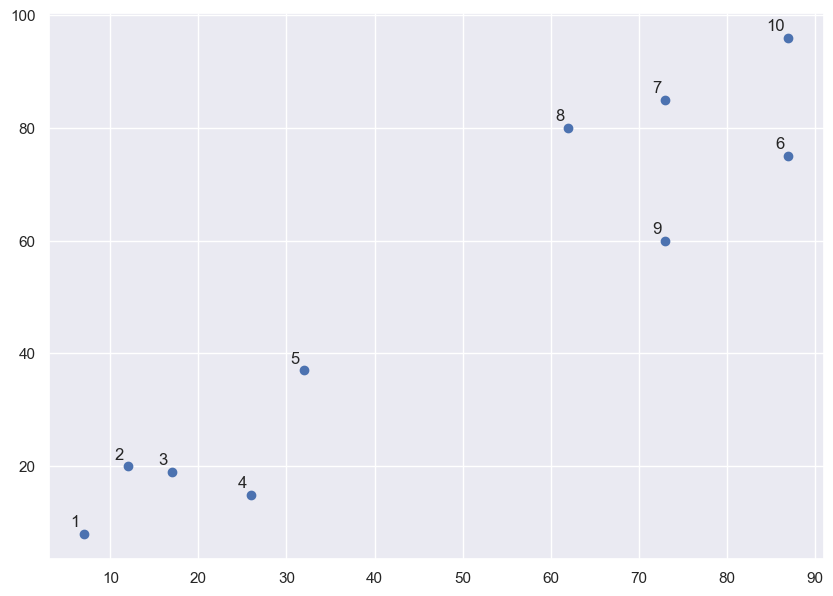

In [53]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array(
    [[7, 8], [12, 20], [17, 19], [26, 15], [32, 37], [87, 75], [73, 85], [62, 80], [73, 60], [87, 96],])
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:, 0], X[:, 1], label="True Position")
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.show()

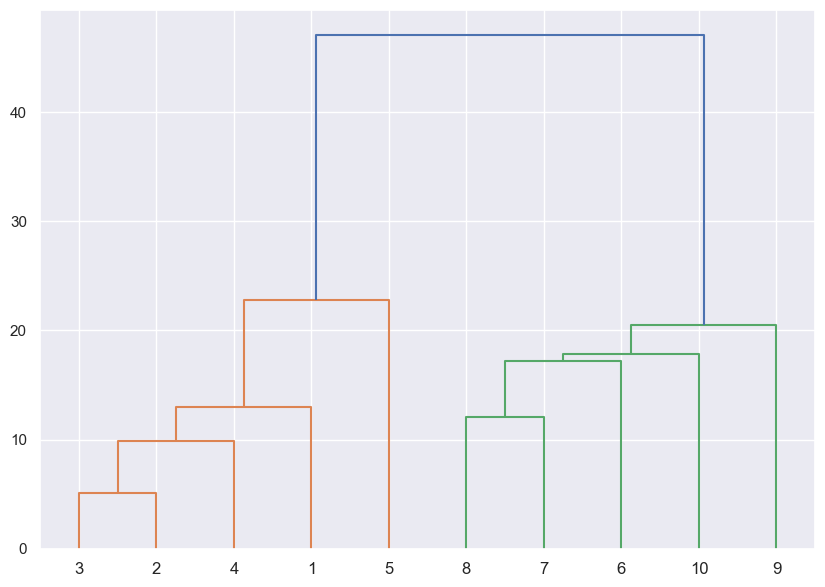

In [54]:
# Далее построим дендрограмму для точек данных с помощью библиотеки
# Scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation = 'top', labels=labelList,
           distance_sort='descending', show_leaf_counts=True)
plt.show()

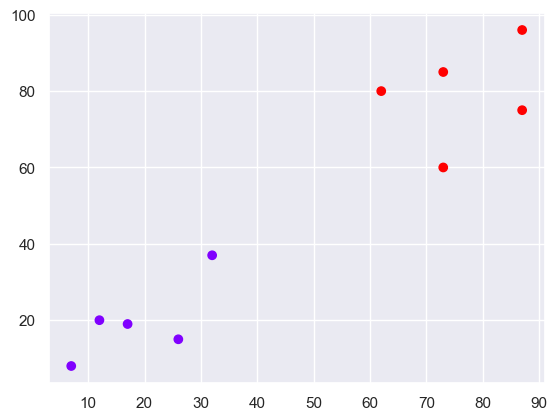

In [55]:
# Далее нам нужно импортировать класс для кластеризации и вызвать его
# метод fit_predict для прогнозирования кластера.
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = cluster.labels_, cmap='rainbow')

### Пример

В этом примере мы выполним иерархическую кластеризацию реальных
данных и посмотрим, как ее можно использовать для решения реальной
проблемы. Выполним кластеризацию данных по набору  

https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv

Задача, которую мы собираемся решить в этом разделе, состоит в том, чтобы  
разделить клиентов на разные группы в зависимости от их покупательских  
тенденций.

In [56]:
# импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# загрузим набор данных
url = 'https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv'
customer_data = pd.read_csv(url)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


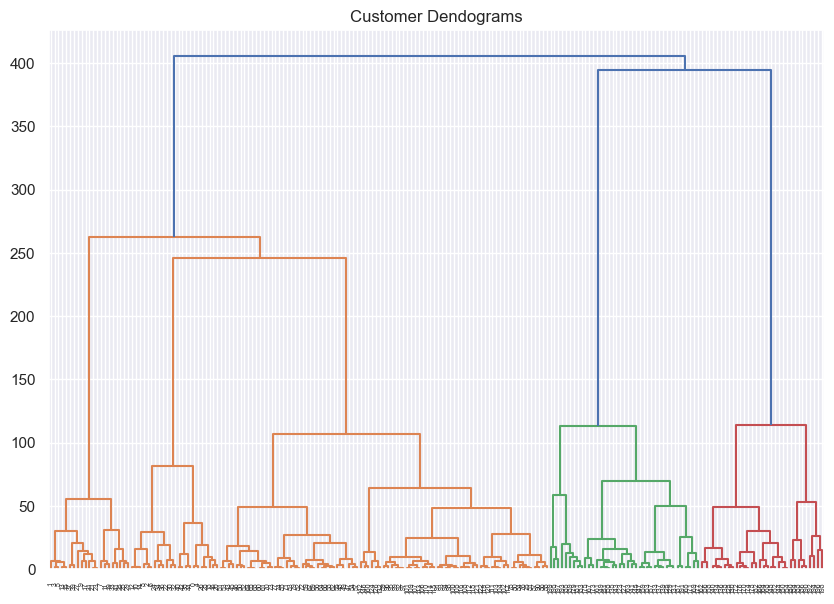

In [59]:
# Наш набор данных состоит из пяти столбцов. Чтобы просмотреть результаты
# в двумерном пространстве, мы сохраним только два из них:«Годовой доход»
# (в тысячах долларов) и «Оценка расходов» (1–100). Столбец «Оценка
# расходов» показывает, как часто человек тратит деньги в торговом центре
# по шкале от 1 до 100, где 100 — это самый высокий расход. Выполним
# следующий скрипт, чтобы отфильтровать первые три столбца из нашего
# набора данных:
data = customer_data.iloc[:, 3: 5].values
# Далее нам нужно знать кластеры, на которые мы хотим разделить наши
# данные. Мы снова будем использовать библиотеку scipy для создания
# дендрограммы:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [63]:
# Если мы нарисуем горизонтальную линию, которая проходит через самое
# длинное расстояние без горизонтальной линии, мы получим 5 кластеров.
# Теперь мы знаем количество кластеров для нашего набора данных,
# следующим шагом будет группировка точек данных в эти пять кластеров.
# Для этого мы снова воспользуемся классом AgglomerativeClustering
# библиотеки sklearn.cluster.
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

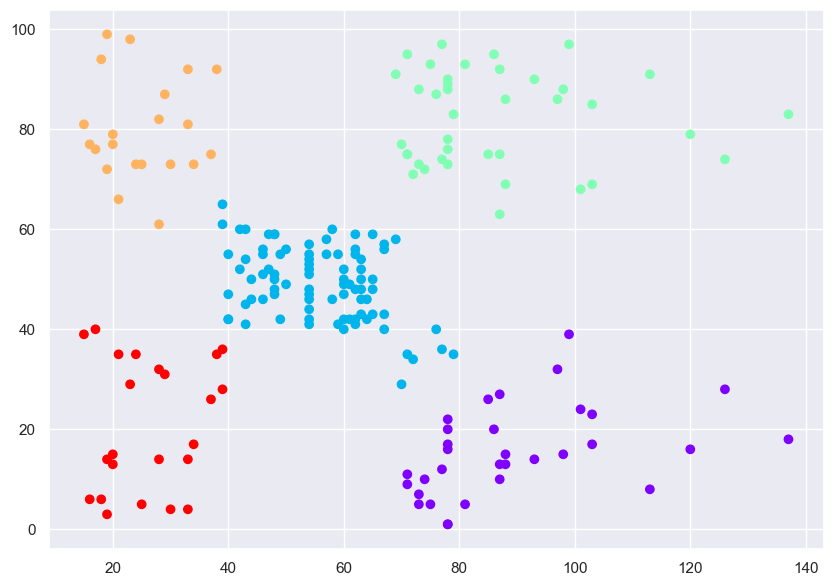

In [64]:
# В качестве последнего шага давайте построим кластеры, чтобы увидеть, как
# на самом деле были сгруппированы наши данные:
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')

### Задача

Выполните иерархическую кластеризацию для набора данных об  
ирисах Фишера. При этом необходимо использовать любые два признака  
(всего их четыре).

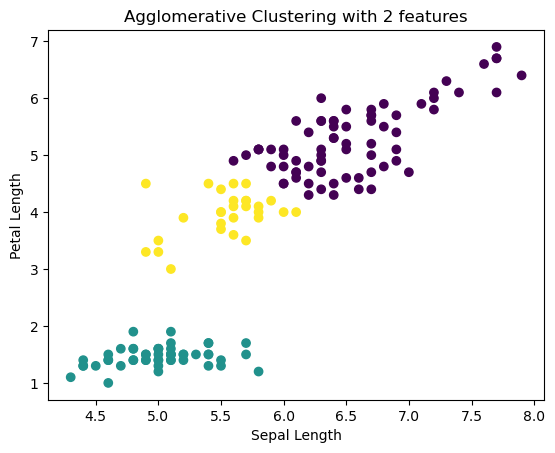

In [3]:
# Сначала мы импортируем необходимые библиотеки и загрузим данные:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [0, 2]]

# Затем мы можем выполнить иерархическую кластеризацию с помощью класса
# AgglomerativeClustering. Мы выберем количество кластеров равным 3, так как
# именно столько видов ирисов содержится в наборе данных:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X)

# Теперь мы можем визуализировать полученные кластеры на графике:
plt.scatter(X[:, 0], X[:, 1], c=agg_clustering.labels_)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Agglomerative Clustering with 2 features")
plt.show()